In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from traj_to_path import (graph, 
                          pipeline, 
                          plots, 
                          utils)

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Get data from MD trajectory

In [30]:
traj_path = './data/05_md001_1C5X.nc'
parm_path = './data/1C5X_complex_solvated.prmtop'

pipeline.get_traj_feats(traj_path, parm_path)

In [32]:
!ls *.dat

corrmat.dat  distmat.dat


## Plot matrices 

In [20]:
dist_mat = './data/distmat.dat'
corr_mat = './data/corrmat.dat'

dist = utils.parse_mat(dist_mat)
corr = utils.parse_mat(corr_mat)

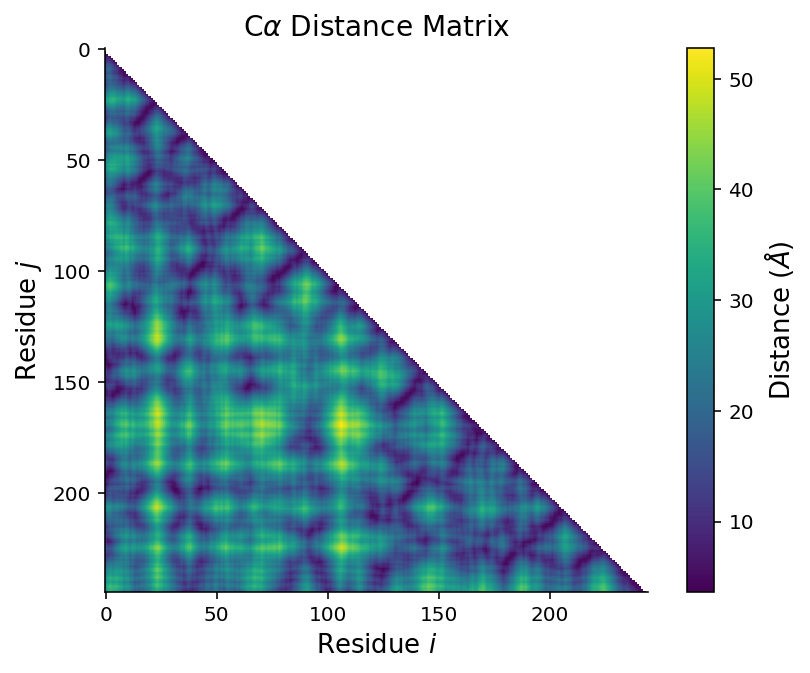

In [21]:
plots.plot_mat(dist, mat_type='dist')

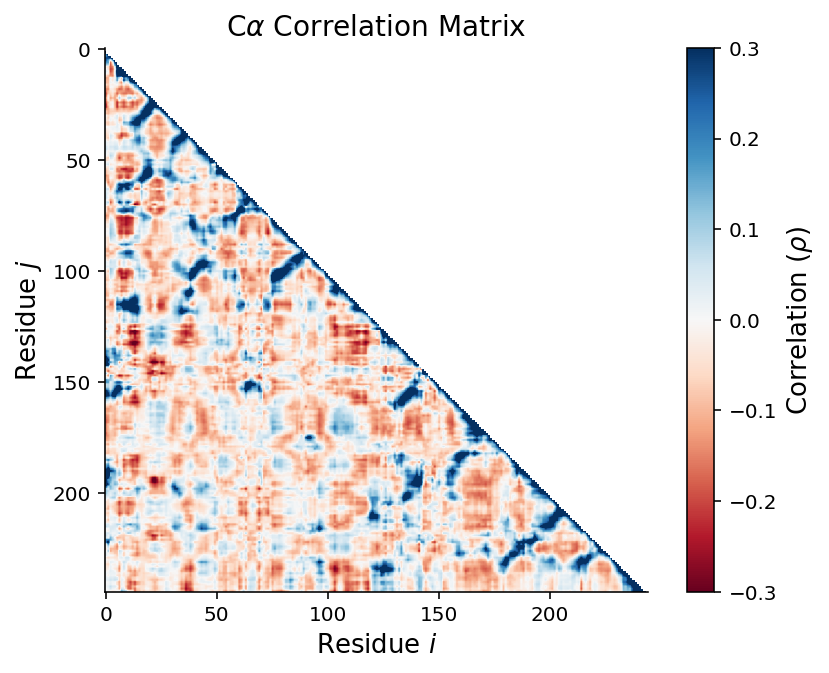

In [34]:
plots.plot_mat(corr, mat_type='corr', vmin=-0.3, vmax=0.3)

## Full structure community

In [23]:
dist_mat = './data/distmat.dat'
corr_mat = './data/corrmat.dat'

dist = utils.parse_mat(dist_mat)
corr = utils.parse_mat(corr_mat)

In [24]:
traj_df, traj_graph = graph.mats_to_edges(dist, corr)

In [25]:
# edgelist by residue 1-index numbering
traj_df.head()

,source,target,weight
0,1,2,0.151811
1,1,141,0.294136
2,1,142,0.332547
3,1,143,0.279841
4,1,192,0.302771


In [28]:
plots.pymol_com(traj_graph, labels=True)

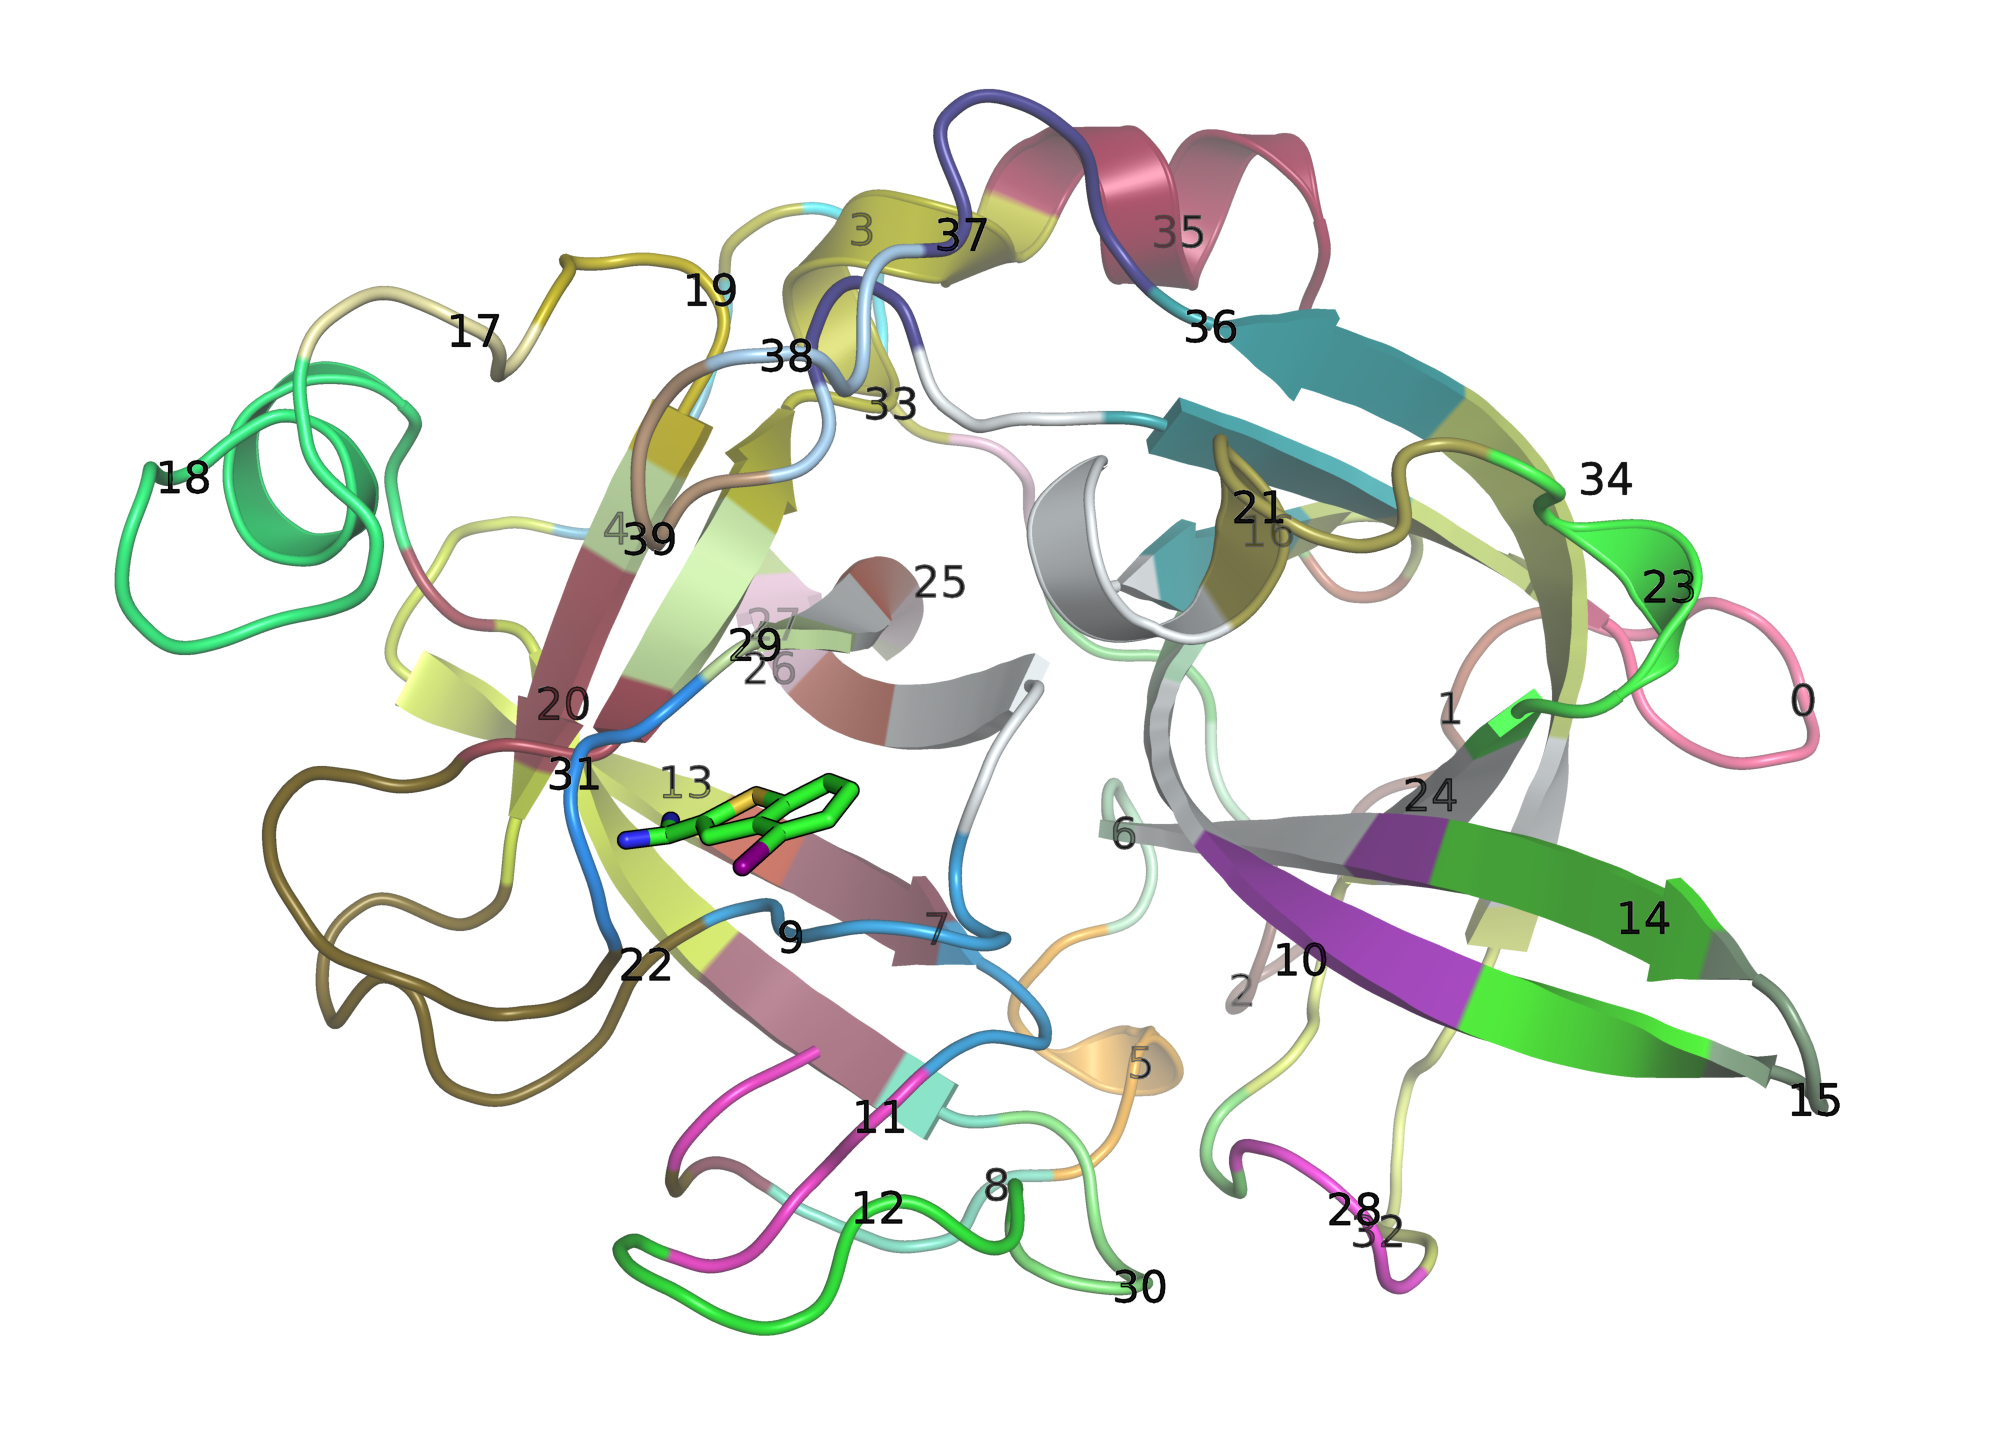

## Shortest path map

In [3]:
dist_mat = './data/distmat.dat'
corr_mat = './data/corrmat.dat'

In [4]:
spm_df, spm_graph = pipeline.get_sp_graph(dist_mat, corr_mat)

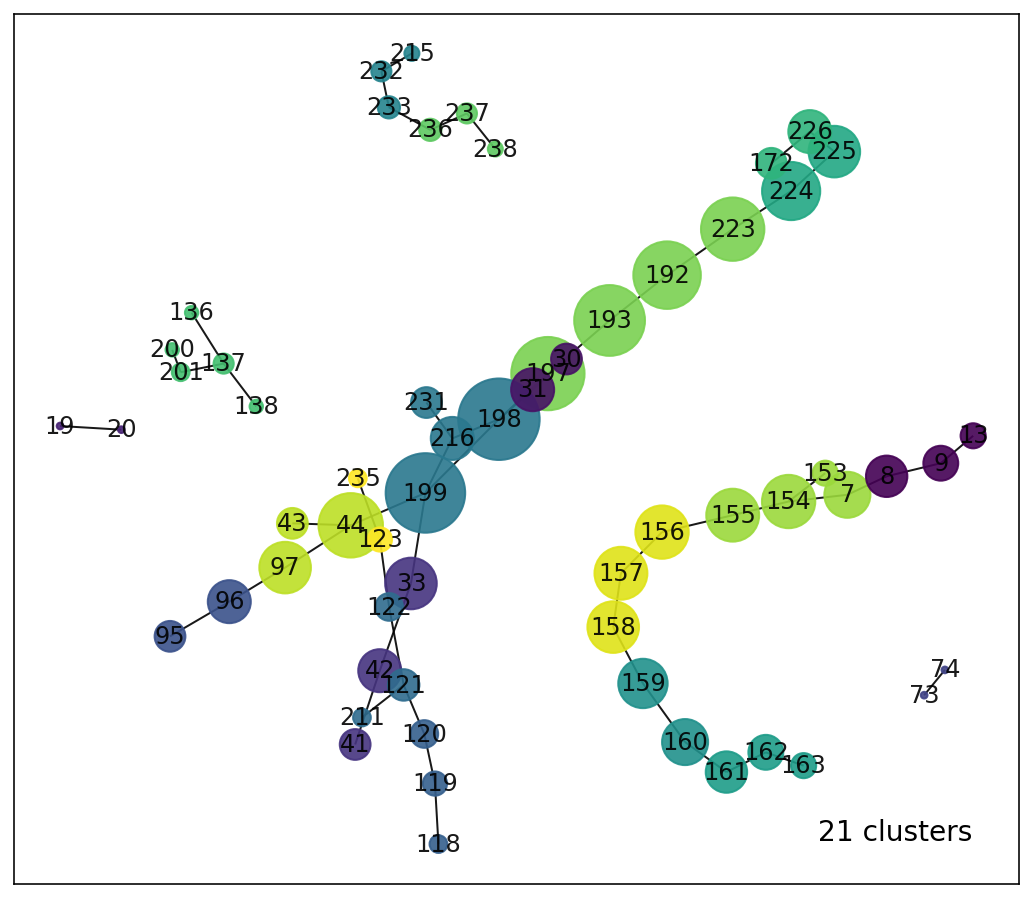

In [40]:
plots.plot_graph(spm_graph)

In [5]:
plots.pymol_spm(spm_graph)

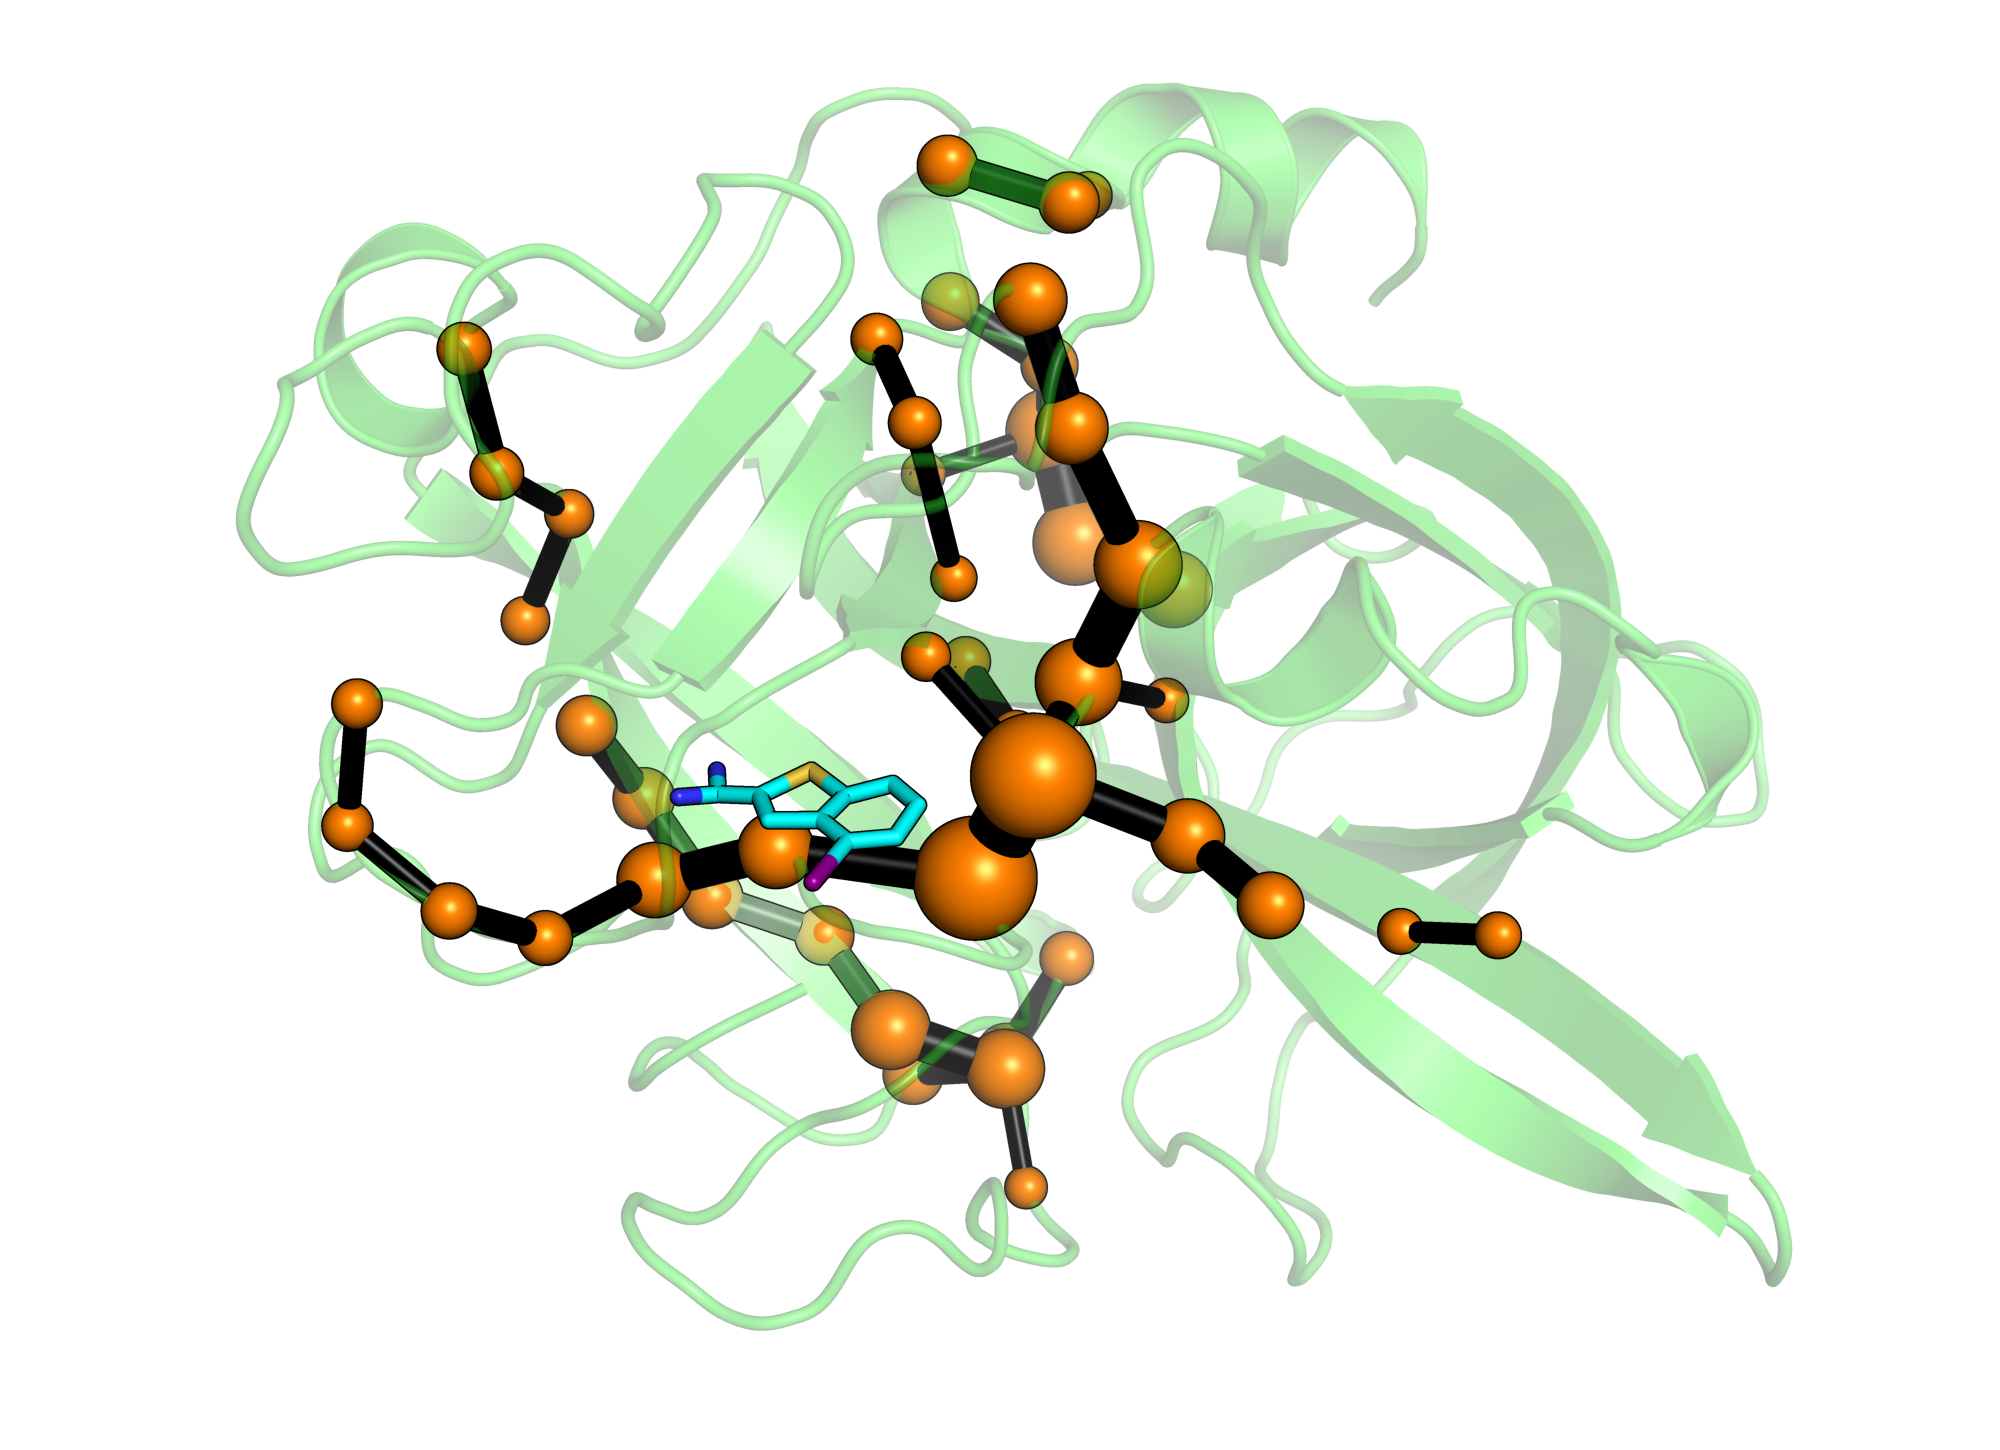